In [6]:
import pandas as pd
from glob import glob

In [2]:
df = pd.read_csv('../TMSIM-500/data.csv', sep=',', encoding='utf-8')
df.head(5)

,Type,Case ID,Contested Trademark,Earlier Trademark,Visual Similarity,Aural Similarity,Conceptual Similarity,Degree of Attention,Distinctiveness,Opposition Outcome,Item Similarity,Outcome,Contested Goods and Services,Earlier Goods and Services
0,word,003178074,TP HOME,TP,4.0,4.0,0.0,3.0,3.0,upheld,3,upheld,plates for diffusing aromatic oil,air fragrancing preparations
1,word,003178074,TP HOME,TP,4.0,4.0,0.0,3.0,3.0,upheld,3,upheld,aromatic oil diffusers other than reed diffuse...,air fragrancing preparations
2,word,003178074,TP HOME,TP,4.0,4.0,0.0,3.0,3.0,upheld,3,upheld,pomanders [containers],air fragrancing preparations
3,word,003178074,TP HOME,TP,4.0,4.0,0.0,3.0,3.0,upheld,3,upheld,containers for pot pourri,air fragrancing preparations
4,word,003178074,TP HOME,TP,4.0,4.0,0.0,3.0,3.0,upheld,3,upheld,perfume burners,air fragrancing preparations


In [5]:
X_raw = df[['Case ID', 'Contested Trademark', 'Earlier Trademark', 'Contested Goods and Services', 'Earlier Goods and Services']]
y_raw = df[['Outcome']]

In [7]:
image_path_dict = {}
image_paths = [f.replace('\\', '/') for f in glob('../TMSIM-500/Dataset Images/*')]

for path in image_paths:
    id = path.split('/')[-1].split('_')[0]
    if id not in image_path_dict:
        image_path_dict[id] = []
    image_path_dict[id].append(path)


In [42]:
import strsimpy.levenshtein as lev
import strsimpy.normalized_levenshtein as norm_lev
import strsimpy.damerau as dmr
import strsimpy.optimal_string_alignment as osa
import strsimpy.jaro_winkler as jw
import strsimpy.longest_common_subsequence as lcs
import strsimpy.ngram as ngram
import strsimpy.qgram as qgram
import strsimpy.cosine as cosine
import strsimpy.jaccard as jaccard
import strsimpy.sorensen_dice as sorensen
import strsimpy.overlap_coefficient as ovlp
import strsimpy.sift4 as sift
from strsimpy.metric_lcs import MetricLCS


from strsimpy import SIFT4

In [44]:
class visual_similarities():

    def __init__(self, s1, s2):
        if self._contains_irregular_capitalization(s1):
            self.s1 = s1
        else:
            self.s1 = s1.lower()
        if self._contains_irregular_capitalization(s2):
            self.s2 = s2
        else:
            self.s2 = s2.lower()


    def _contains_irregular_capitalization(self, s):
        if all([(not c.islower()) for c in s]):
            return False # all uppercase
        if all([(not c.isupper()) for c in s]):
            return False # all lowercase
        for word in s.split(' '):
            if word[0].islower() and not all([(not c.isupper()) for c in word]):
                return True
            if word[0].isupper() and not all([(not c.islower()) for c in word]):
                return True
        return False

    def lev(self):
        return lev.Levenshtein().distance(self.s1, self.s2)

    def normalized_lev(self):
        return norm_lev.NormalizedLevenshtein().similarity(self.s1, self.s2)

    def damerau(self):
        return dmr.Damerau().distance(self.s1, self.s2)

    def osa(self):
        return osa.OptimalStringAlignment().distance(self.s1, self.s2)

    def jw(self):
        return jw.JaroWinkler().similarity(self.s1, self.s2)

    def lcs(self):
        return lcs.LongestCommonSubsequence().distance(self.s1, self.s2)

    def metric_lcs(self):
        return MetricLCS().distance(self.s1, self.s2)

    def two_n_gram(self):
        return ngram.NGram(2).distance(self.s1, self.s2)

    def three_n_gram(self):
        return ngram.NGram(3).distance(self.s1, self.s2)

    def four_n_gram(self):
        return ngram.NGram(4).distance(self.s1, self.s2)

    def two_q_gram(self):
        return qgram.QGram(2).distance(self.s1, self.s2)

    def three_q_gram(self):
        return qgram.QGram(3).distance(self.s1, self.s2)

    def four_q_gram(self):
        return qgram.QGram(4).distance(self.s1, self.s2)

    def two_cosine(self):
        return cosine.Cosine(2).similarity(self.s1, self.s2)

    def three_cosine(self):
        return cosine.Cosine(3).similarity(self.s1, self.s2)

    def four_cosine(self):
        return cosine.Cosine(4).similarity(self.s1, self.s2)

    def two_jaccard(self):
        return jaccard.Jaccard(2).similarity(self.s1, self.s2)

    def three_jaccard(self):
        return jaccard.Jaccard(3).similarity(self.s1, self.s2)

    def four_jaccard(self):
        return jaccard.Jaccard(4).similarity(self.s1, self.s2)

    def sorensen(self):
        return sorensen.SorensenDice().similarity(self.s1, self.s2)

    def two_overlap(self):
        try:
            return ovlp.OverlapCoefficient(2).similarity(self.s1, self.s2)
        except ZeroDivisionError:
            return 0

    def three_overlap(self):
        try:
            return ovlp.OverlapCoefficient(3).similarity(self.s1, self.s2)
        except ZeroDivisionError:
            return 0

    def four_overlap(self):
        try:
            return ovlp.OverlapCoefficient(4).similarity(self.s1, self.s2)
        except ZeroDivisionError:
            return 0

    def sift(self):
        return sift.SIFT4().distance(self.s1, self.s2)

In [45]:
s1 = 'hi'
s2 = 'hello'

sim = visual_similarities(s1, s2)
methods = [method for method in dir(sim) if callable(getattr(sim, method)) if not method.startswith('_')]
for m in methods:
    print(getattr(sim, m)(), m)

4 damerau
0.0 four_cosine
0.0 four_jaccard
0.8 four_n_gram
0 four_overlap
2 four_q_gram
0.5666666666666667 jw
5 lcs
4 lev
0.8 metric_lcs
0.19999999999999996 normalized_lev
4 osa
4 sift
0.0 sorensen
0.0 three_cosine
0.0 three_jaccard
0.8 three_n_gram
0 three_overlap
3 three_q_gram
0.0 two_cosine
0.0 two_jaccard
0.7 two_n_gram
0.0 two_overlap
5 two_q_gram


In [9]:
for i, row in X_raw.iterrows():
    if row['Case ID'] not in image_path_dict:
        row['lev']

fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig
fig


In [1]:
from tml.tml import TrademarkML
import pandas as pd

In [3]:
df = pd.read_csv('../TMSIM-500/data.csv', sep=',', encoding='utf-8')


tml = TrademarkML(dataset=df, img_path='../TMSIM-500/Dataset Images', letter_path='../weighted_levenshtein/characters', stats_path='../dataset stats', weights_path='../weighted_levenshtein')


0it [00:00, ?it/s]C:\Users\maxha\Desktop\TrademarkML-v1\tml\tml.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.at[i, f'{call_name}'] = method_value
C:\Users\maxha\Desktop\TrademarkML-v1\tml\tml.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.at[i, f'{call_name}'] = method_value
C:\Users\maxha\Desktop\TrademarkML-v1\tml\tml.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

KeyboardInterrupt: 

In [12]:
from tml.tml import TrademarkML
import pandas as pd

In [13]:
trademarkml = TrademarkML()

In [14]:
full_df = pd.read_csv('../TMSIM-500/data.csv', sep=',', encoding='utf-8')

In [15]:
word_df = pd.read_csv('./features_full.csv', sep=',', encoding='utf-8')

In [16]:
word_gt = full_df[full_df['Type'] == 'word']
word_df = word_df[full_df['Type'] == 'word']
word_df['Outcome'] = word_gt['Outcome']

In [17]:
train_word_df, test_word_df, train_idx, test_idx = trademarkml.train_test_split(df=word_df, id_col='Case ID')
x_train, y_train = trademarkml.get_x_y_from_df(df=train_word_df, y_col='Outcome')
x_test, y_test = trademarkml.get_x_y_from_df(df=test_word_df, y_col='Outcome')
trademarkml.fit(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, train_idx=train_idx, word_mark_df=word_df)

['damerau', 'four_cosine', 'four_jaccard', 'four_n_gram', 'four_overlap', 'four_q_gram', 'jw', 'lcs', 'lev', 'metric_lcs', 'normalized_lev', 'osa', 'sift', 'sorensen', 'three_cosine', 'three_jaccard', 'three_n_gram', 'three_overlap', 'three_q_gram', 'two_cosine', 'two_jaccard', 'two_n_gram', 'two_overlap', 'two_q_gram']
['metaphone2_damerau', 'metaphone2_four_cosine', 'metaphone2_four_jaccard', 'metaphone2_four_n_gram', 'metaphone2_four_overlap', 'metaphone2_four_q_gram', 'metaphone2_jw', 'metaphone2_lcs', 'metaphone2_lev', 'metaphone2_metric_lcs', 'metaphone2_normalized_lev', 'metaphone2_osa', 'metaphone2_sift', 'metaphone2_sorensen', 'metaphone2_three_cosine', 'metaphone2_three_jaccard', 'metaphone2_three_n_gram', 'metaphone2_three_overlap', 'metaphone2_three_q_gram', 'metaphone2_two_cosine', 'metaphone2_two_jaccard', 'metaphone2_two_n_gram', 'metaphone2_two_overlap', 'metaphone2_two_q_gram', 'metaphone3_damerau', 'metaphone3_four_cosine', 'metaphone3_four_jaccard', 'metaphone3_four_

KeyboardInterrupt: 

In [11]:
train_word_df

,Case ID,Contested Trademark,Earlier Trademark,Contested Goods and Services,Earlier Goods and Services,damerau,four_cosine,four_jaccard,four_n_gram,four_overlap,...,metaphone3_two_q_gram,conc_lev_wordnet,conc_cos_wordnet,conc_lcs_wordnet,vgg16_img_sim,vgg19_img_sim,resnet50_img_sim,google_item_similarity,spacy_item_similarity,Outcome
0,003178074,TP HOME,TP,plates for diffusing aromatic oil,air fragrancing preparations,5.0,0.000000,0.000000,0.714286,0.000000,...,1.0,0.166667,0.117647,0.117647,NaN,NaN,NaN,0.148532,0.219071,upheld
1,003178074,TP HOME,TP,aromatic oil diffusers other than reed diffuse...,air fragrancing preparations,5.0,0.000000,0.000000,0.714286,0.000000,...,1.0,0.166667,0.117647,0.117647,NaN,NaN,NaN,NaN,0.201852,upheld
2,003178074,TP HOME,TP,pomanders [containers],air fragrancing preparations,5.0,0.000000,0.000000,0.714286,0.000000,...,1.0,0.166667,0.117647,0.117647,NaN,NaN,NaN,NaN,0.273260,upheld
3,003178074,TP HOME,TP,containers for pot pourri,air fragrancing preparations,5.0,0.000000,0.000000,0.714286,0.000000,...,1.0,0.166667,0.117647,0.117647,NaN,NaN,NaN,NaN,0.147323,upheld
4,003178074,TP HOME,TP,perfume burners,air fragrancing preparations,5.0,0.000000,0.000000,0.714286,0.000000,...,1.0,0.166667,0.117647,0.117647,NaN,NaN,NaN,NaN,0.385672,upheld
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11810,003166256,Lollipop Test,LOLLIPOP,body fat monitors,medical apparatus and instruments,6.0,0.565685,0.363636,0.544872,0.800000,...,1.0,0.190476,1.000000,1.000000,0.723595,0.774913,0.807310,NaN,0.145517,NaN
11811,003166256,Lollipop Test,LOLLIPOP,surgical robots,medical apparatus and instruments,6.0,0.565685,0.363636,0.544872,0.800000,...,1.0,0.190476,1.000000,1.000000,0.723595,0.774913,0.807310,NaN,0.245337,NaN
11812,003168304,SUN ENERGY GROUP,sunenergy,Photovoltaic apparatus for generating electricity,Photovoltaic cells; solar panels for electrici...,7.0,0.339683,0.187500,0.500000,0.500000,...,0.0,0.200000,1.000000,1.000000,0.620244,0.602973,0.394432,NaN,0.785544,NaN
11813,003165296,Red Pill IT Solutions,REDPILL LINPRO,Development and design of computer software,Software development,14.0,0.071067,0.035714,0.706349,0.090909,...,2.0,0.181818,0.200000,0.117647,0.666533,0.487492,0.676024,NaN,0.761139,NaN


In [19]:
results = ''
with open('results_rf.txt', 'r') as f:
    results = f.read()

In [50]:
import re

stats = {}

m = re.finditer(r'[\d]{1,4}:\s([a-zA-Z][^\n]+)\n\n*([^}]*)', results)
for match in m:
    features = match.group(1).split(', ')
    for f in features:
        if f not in stats:
            stats[f] = {}

    performance = match.group(2).split('\n\n')[0].split('\n')
    for p in performance:
        d = p.split(': ')
        metric = d[0]
        score = float(d[1])

        for f in features:
            if metric not in stats[f]:
                stats[f][metric] = []

            stats[f][metric].append(score)



In [51]:
stats

{'damerau': {'accuracy': [0.6833616298811545,
   0.6952461799660441,
   0.6120543293718166,
   0.6366723259762309,
   0.669779286926995,
   0.47877758913412566,
   0.6578947368421053,
   0.6443123938879457,
   0.567062818336163,
   0.6358234295415959,
   0.6876061120543294,
   0.466893039049236,
   0.5619694397283531,
   0.5568760611205433,
   0.5458404074702886,
   0.6511035653650254,
   0.7088285229202037,
   0.6366723259762309,
   0.5033955857385399,
   0.5466893039049237,
   0.5534804753820034,
   0.6833616298811545,
   0.6952461799660441,
   0.6120543293718166,
   0.6833616298811545,
   0.6952461799660441,
   0.6120543293718166,
   0.6451612903225806,
   0.4838709677419355,
   0.5959252971137521,
   0.6417657045840407,
   0.5959252971137521,
   0.5543293718166383,
   0.6816638370118846,
   0.6952461799660441,
   0.6120543293718166,
   0.6833616298811545,
   0.6952461799660441,
   0.6120543293718166,
   0.6103565365025467,
   0.5933786078098472,
   0.5789473684210527,
   0.65110356

In [52]:
len(stats['damerau']['accuracy'])

144

In [55]:
import numpy as np

#(mean – (z* (std_dev/sqrt(n))

statistics = {}

for f in stats:
    if f not in statistics:
        statistics[f] = {}

    for m in stats[f]:
        statistics[f][f'{m}_mean'] = np.mean(stats[f][m])
        statistics[f][f'{m}_std'] = np.std(stats[f][m])
        statistics[f][f'{m}_ci95'] = (statistics[f][f'{m}_mean'] - (1.96 * (statistics[f][f'{m}_std']/len(stats[f][m]))))

In [56]:
statistics

{'damerau': {'accuracy_mean': 0.6146717600452745,
  'accuracy_std': 0.0628831887738826,
  'accuracy_ci95': 0.6138158499758521,
  'precision_mean': 0.6773820219589841,
  'precision_std': 0.03065033753119389,
  'precision_ci95': 0.676964836809254,
  'recall_mean': 0.8180938937682978,
  'recall_std': 0.09491971673213113,
  'recall_ci95': 0.8168019309572215,
  'roc_mean': 0.5036171568579022,
  'roc_std': 0.054475714460202676,
  'roc_ci95': 0.5028756818555272,
  'f1_mean': 0.7395103106875605,
  'f1_std': 0.054279087002989355,
  'f1_ci95': 0.7387715120033531},
 'metaphone2_damerau': {'accuracy_mean': 0.6265874363327674,
  'accuracy_std': 0.05365024750524692,
  'accuracy_ci95': 0.6251853765312969,
  'precision_mean': 0.6813494089613785,
  'precision_std': 0.026080852274784096,
  'precision_ci95': 0.6806678293552642,
  'recall_mean': 0.8397992471769133,
  'recall_std': 0.08001390497573163,
  'recall_ci95': 0.8377082171268809,
  'roc_mean': 0.5101883374992178,
  'roc_std': 0.048387095766778535,

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

stats_df = pd.DataFrame(statistics).T

<Axes: ylabel='damerau'>

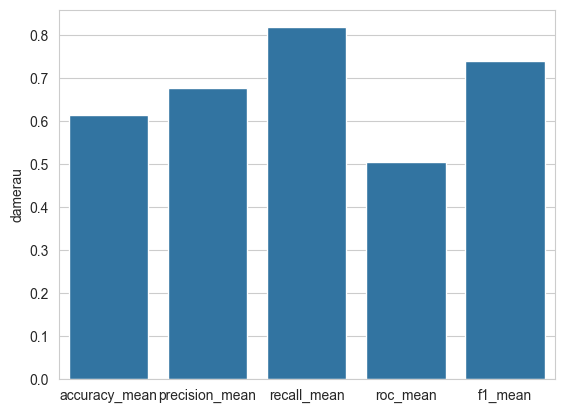

In [77]:
cols = [c for c in stats_df.columns if 'mean' in c]
sns.barplot(data=stats_df[cols].iloc[0])